# NoisET example: Null model learning  

<p>
In this notebook, we want to show examples to help the user to learn how NoisET works in practise when using its first function (ie learning experimental noise model from replicate samples). The output is a <strong>list </strong> of five, four or 2 <strong> parameters </strong> regarding the chosen noise model (respectively Negative Binomial + Poisson, Negative Binomial or Poisson). Details about the distributions and the meaning of each parameters are detailed in methods section of READme document. </p>


 In 1/ we are training the noise statistical model on <strong> mRNA </strong> data published in 2019 [Precise tracking of vaccine-responding T cell clones reveals convergent and personalized response in identical twins, Pogorelyy et al, PNAS](https://www.pnas.org/content/115/50/12704) with Negative Binomial model (noise_model=1 in the package) and generate synthetic data with <strong> <em> NoisET </em> </strong>thanks to the former learning step for qualitative check. 


In 2/ we are testing the noise statistical model on <strong> gDNA </strong> data published in 2019 [Model to improve specificity for identification of clinically-relevant expanded T cells in peripheral blood, Rytlewski et al, PLOS ONE](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0213684) with Poisson (noise_model=2 in the package) and generate synthetic data with <strong> <em> NoisET </em> </strong> thanks to the former learning step for qualitative check. 

In the article linked to this github, results using noise_model = 0 (Negative Binomial + Poisson) are displayed.
 

In [1]:
import numpy as np
import noisets
from noisets import noisettes as ns

import matplotlib.pyplot as plt

# 1/ Noise Model with mRNA data ($S_1$ [Pogorelyy et al, PNAS] ) Negative Binomial Noise Model

### A/ Import data 

- Create an object that will be associate to a particular patient, for two dates of interest. In this notebook, we are focused on the null-model learning. So on, "time_1" and "time_2" will be exactlyt the same. For the case of the null-model learning,the two time points refer to two different biological samples.

In [2]:
# Load data 
path = '../../../Data-sets/Yellow_fever/'
filename1 = 'S1_0_F1_.txt' # first biological replicate
filename2 = 'S1_0_F2_.txt' # second biological replicate
colnames1 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] #colnames that will change if you work with a different data-set
colnames2 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] # same as above

# check 
cl_S1 = ns.Data_Process(path, filename1, filename2, colnames1,  colnames2)
print("First Filename is : " , cl_S1.filename1)
print("Second Filename is : ",  cl_S1.filename2)
print("Name of the columns of first file are : ", cl_S1.colnames1)
print("Name of the columns of second file are : ", cl_S1.colnames2)

First Filename is :  S1_0_F1_.txt
Second Filename is :  S1_0_F2_.txt
Name of the columns of first file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']
Name of the columns of second file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']


- Create the data-frame with import_data method

In [3]:
n, df = cl_S1.import_data()

In [4]:
df

,Clone_fraction_1,Clone_fraction_2,Clone_count_1,Clone_count_2,ntCDR3,AACDR3
0,0.007298,0.006993,7000.0,5646.0,TGCGCCAGCAGCCCCCAGTTCACAGGCTCCTACGAGCAGTACTTC,CASSPQFTGSYEQYF
1,0.004135,0.003625,3966.0,2927.0,TGTGCCAGCAGTTCCCCCATAGCGGGACAAAGCTCCTACGAGCAGT...,CASSSPIAGQSSYEQYF
2,0.003358,0.003473,3221.0,2804.0,TGCAGTGCTTCTCTTGCGTCGGGCACCGGGGAGCTGTTTTTT,CSASLASGTGELFF
3,0.002515,0.002272,2412.0,1834.0,TGTGCCAGCAGTTACGGACAGGGCAATCAGCCCCAGCATTTT,CASSYGQGNQPQHF
4,0.002389,0.002308,2292.0,1863.0,TGTGCCAGCAGTTGGGGACAGGGGGTAAACGAGCAGTACTTC,CASSWGQGVNEQYF
...,...,...,...,...,...,...
1037495,0.000000,0.000001,0.0,1.0,TGTGCCACAAGAC,CA_QD
1037496,0.000000,0.000001,0.0,1.0,TGAGCTGTTTTTT,*A_FF
1037497,0.000000,0.000001,0.0,1.0,TGTGCTCTTTTA,CALL
1037498,0.000000,0.000001,0.0,1.0,TGTGCCCCTTTC,CAPF


- Visualization of the data

<IPython.core.display.Javascript object>


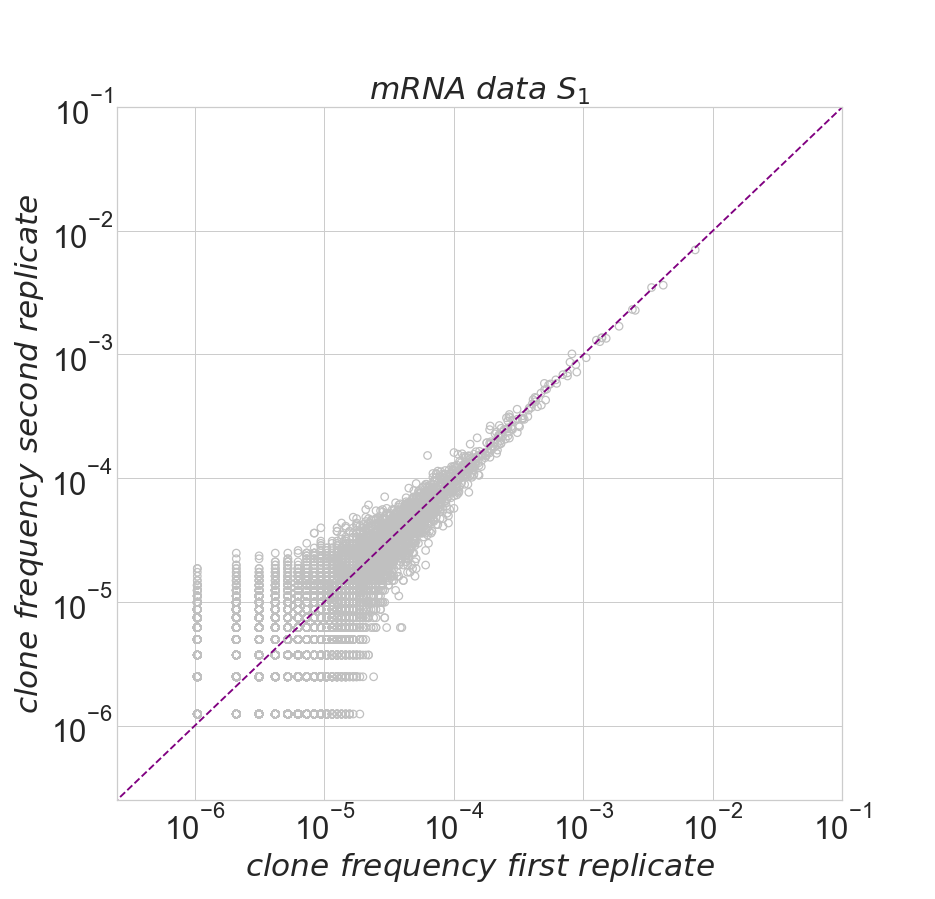

Text(0.5, 1.0, '$ mRNA \\ data \\ S_1 $')

In [5]:
%matplotlib notebook 

plt.figure(figsize=(10.4,10))
plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)
X = np.linspace(0,1, 1000)

plt.style.use('seaborn-whitegrid')
plt.scatter(df['Clone_fraction_1'], df['Clone_fraction_2'], c='none', edgecolor='silver')
plt.plot(X,X, linestyle ='--', color ='purple')
plt.xlabel(r'$clone \ frequency \ first \ replicate $', fontsize = 25)
plt.ylabel(r'$clone \ frequency \ second \ replicate $', fontsize = 25)
plt.xscale('log')
plt.yscale('log')
plt.axis([2.5e-7, 1e-1, 2.5e-7, 1e-1])

plt.title(r'$ mRNA \ data \ S_1 $', fontsize = 25)

### B/ Null-model learning

In [6]:
noise_model = 1 # Negative Binomial 
#other models :
# 0 : NB + Poisson
# 1 : NB
# 2 : Poisson
init_paras_arr = [ np.asarray([ -2.046736,    1.539405,    1.234712,    6.652190,  -9.714225]), \
                    np.asarray([-2.02192528,   0.45220384,   1.06806274, -10.18866972]), \
                     np.asarray([-2.15206189,  -9.46699067])
                 ]
init_paras = init_paras_arr[noise_model]

In [7]:
null_model = ns.NoiseModel() 

In [8]:
null_model.learn_null_model(df, noise_model, init_paras)

Iter      alph_rho  beta      alpha     fmin      


/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:188: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:188: RuntimeWarning: invalid value encountered in log
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:290: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:395: RuntimeWarning: divide by zero encountered in log


1 -2.097399 0.524142 0.900575 -10.190049 
1.6823103173690537
2 -2.122412 0.497383 0.968364 -10.193483 
1.6625287136962426
3 -2.089600 0.495199 0.979827 -10.191414 
1.6616052552191019
4 -2.093349 0.497301 0.981437 -10.192003 
1.6615764380048534
5 -2.093254 0.499964 0.982342 -10.192724 
1.661570075611888
6 -2.093038 0.513216 0.986833 -10.195202 
1.6615409882032315
7 -2.088517 0.578020 1.008753 -10.206572 
1.661451580158759
8 -2.087174 0.602816 1.015344 -10.211400 
1.6614439135242671
9 -2.087505 0.605518 1.015914 -10.212140 
1.6614438915953345
10 -2.087288 0.607974 1.016654 -10.212528 
1.661443825639931
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.661443825639931
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10


(     fun: 1.661443825639931
      jac: array([-7.68303871e-05,  5.68971038e-04, -2.20616162e-03, -1.40681863e-04])
  message: 'Optimization terminated successfully.'
     nfev: 62
      nit: 10
     njev: 10
   status: 0
  success: True
        x: array([ -2.08728818,   0.60797422,   1.01665421, -10.21252814]),
 -7.014844725242587e-07)

### C/ Generate synthetic data with NoisET

Create a Generator object and use the method gen_synthetic_data_Null

In [9]:
cl_S1_gen = ns.Generator()
paras = [ -2.087288, 0.607974, 1.016654, -10.212528 ] #parameters learnt in the previous cell 
noise_model = 1 # Negative Binomial Noise model
NreadsI = np.sum(df['Clone_count_1']) # Total number of reads in the first sample
NreadsII = np.sum(df['Clone_count_2']) # Total number of reads in the second sample
Nsamp = len(df) # total number of clones found in both samples

f_samples, pair_samples = cl_S1_gen.gen_synthetic_data_Null(paras, noise_model, NreadsI, NreadsII, Nsamp)

/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:1112: RuntimeWarning: divide by zero encountered in log


Model probs: 0.5204672741715457 0.43625672152485423 0.043276004303599895
q samples: 1037500 539608 453118 44774
q sampled probs: 0.5201040963855421 0.43674024096385544 0.04315566265060241


/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:1176: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:1219: RuntimeWarning: divide by zero encountered in log


In [7]:
pair_samples

,Clone_count_1,Clone_count_2,Clone_fraction_1,Clone_fraction_2
0,0.0,2.0,0.000000,0.000002
1,0.0,2.0,0.000000,0.000002
2,0.0,1.0,0.000000,0.000001
3,0.0,1.0,0.000000,0.000001
4,0.0,1.0,0.000000,0.000001
...,...,...,...,...
1037495,4293.0,3652.0,0.004227,0.004258
1037496,4643.0,3969.0,0.004571,0.004627
1037497,5528.0,4779.0,0.005442,0.005572
1037498,16508.0,13665.0,0.016252,0.015931


<IPython.core.display.Javascript object>


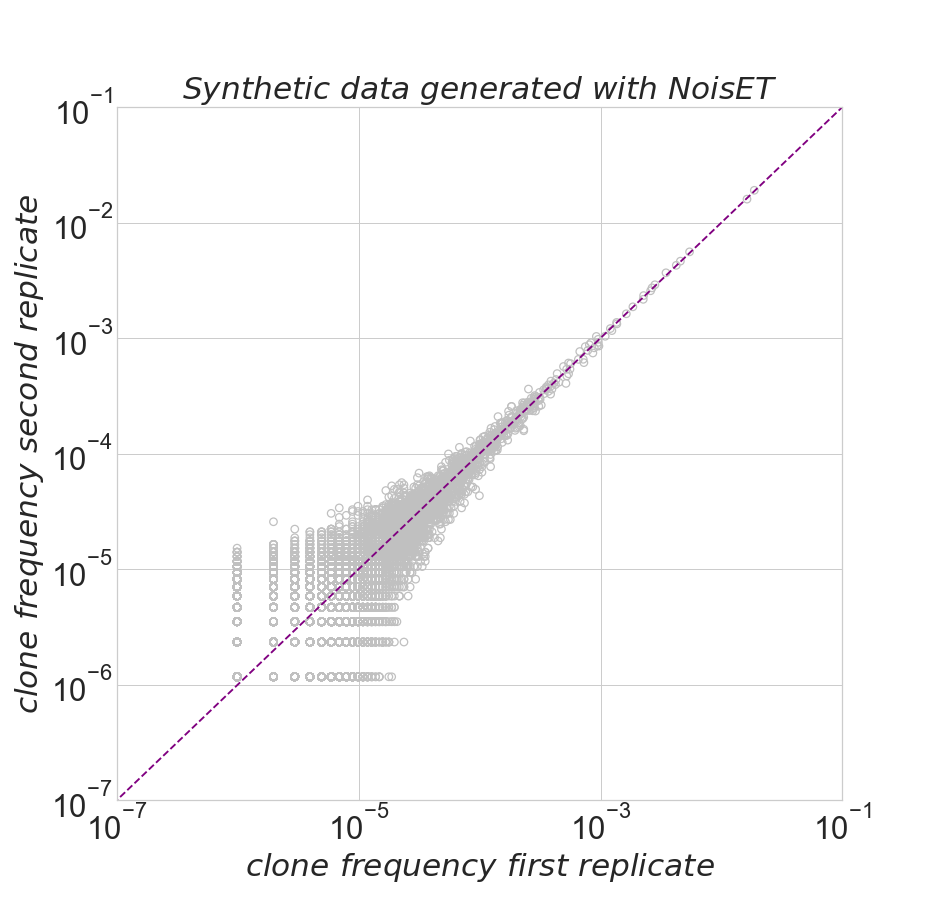

Text(0.5, 1.0, '$ Synthetic \\ data \\ generated \\ with \\ NoisET $')

In [15]:
%matplotlib notebook 

plt.figure(figsize=(10.4,10))

plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)
X = np.linspace(0,1, 1000)

plt.style.use('seaborn-whitegrid')
plt.scatter(pair_samples['Clone_fraction_1'], pair_samples['Clone_fraction_2'], c='none', edgecolor='silver')
plt.xlabel(r'$clone \ frequency \ first \ replicate $', fontsize = 25)
plt.ylabel(r'$clone \ frequency \ second \ replicate $', fontsize = 25)
plt.plot(X,X, linestyle ='--', color ='purple')
plt.xscale('log')
plt.yscale('log')
plt.axis([1e-7, 1e-1, 1e-7, 1e-1])

plt.title(r'$ Synthetic \ data \ generated \ with \ NoisET $', fontsize = 25)

# 2/ Noise Model with gDNA data ( [Rytlewski et al, PLOS ONE ] ) Negative Binomial + Poisson Noise Model

### A/ Import data 

In [11]:
path = '../../../Data-sets/Adaptive Technology/'
filename1 = 'replicate_1_1.tsv' # first biological replicate
filename2 = 'replicate_1_2.tsv' # second biological replicate
colnames1 = ['frequencyCount','count', 'nucleotide', 'aminoAcid'] #colnames that will change if you work with a different data-set
colnames2 = ['frequencyCount','count', 'nucleotide', 'aminoAcid']

cl_rep = ns.Data_Process(path, filename1, filename2, colnames1,  colnames2)
print("First Filename is : " , cl_rep.filename1)
print("Second Filename is : ",  cl_rep.filename2)
print("Name of the columns of first file are : ", cl_rep.colnames1)
print("Name of the columns of second file are : ", cl_rep.colnames2)

First Filename is :  replicate_1_1.tsv
Second Filename is :  replicate_1_2.tsv
Name of the columns of first file are :  ['frequencyCount', 'count', 'nucleotide', 'aminoAcid']
Name of the columns of second file are :  ['frequencyCount', 'count', 'nucleotide', 'aminoAcid']


In [13]:
n, df_gDNA = cl_rep.import_data()

In [17]:
df_gDNA
# Be careful, for this dataset, cloal frequencies are given in percentage 

,Clone_fraction_1,Clone_fraction_2,Clone_count_1,Clone_count_2,ntCDR3,AACDR3
0,0.285097,0.268055,728.0,693.0,CAACTCTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATC...,NaN
1,0.319167,0.327236,815.0,846.0,CTGCTGTCGGCTGCTCCCTCCCAGACATCTGTGTACTTCTGTGCCA...,CASSRTSDYNEQFF
2,0.430386,0.432833,1099.0,1119.0,AGCACCTTGGAGCTGGGGGACTCGGCCCTTTATCTTTGCGCCAGCA...,CASSLALPRVDEQFF
3,0.469548,0.501685,1199.0,1297.0,CTCTCTGGAGCTGGGGGACTCAGCTTTGTATTTCTGTGCCAGCAGC...,NaN
4,0.000392,0.000000,1.0,0.0,CACACCCTGCAGCCAGAAGACTCGGCCCTGTATCTCTGTGCCAGCA...,CASTSIDATNEKLFF
...,...,...,...,...,...,...
280046,0.000000,0.000387,0.0,1.0,TCGGCCCAAAAGAACCCGACAGCTTTCTATCTCTGTGCCAGTAGTA...,CASSIGTSPLKGEAFF
280047,0.000000,0.000387,0.0,1.0,ATCCAGCAGGTAGTGCGAGGAGATTCGGCAGCTTATTTCTGTGCCA...,CASSPGTGGGKAFF
280048,0.000000,0.000387,0.0,1.0,CTGACAGTGACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCT...,CSAAGTIKKAFF
280049,0.000000,0.000387,0.0,1.0,CTCAAGATCCAGCCTGCAGAGCTTGGGGACTCGGCCATGTATCTCT...,CASSLLGSAPFF


<IPython.core.display.Javascript object>


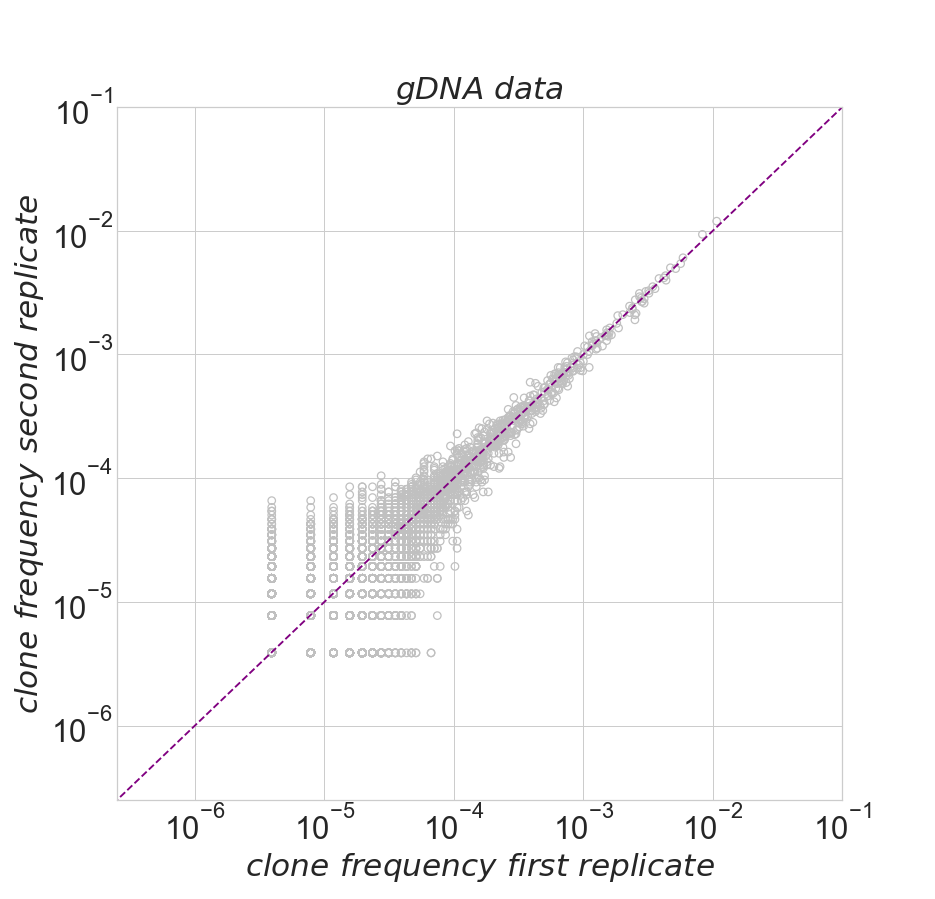

Text(0.5, 1.0, '$ gDNA \\ data  $')

In [30]:
%matplotlib notebook 

plt.figure(figsize=(10.4,10))
plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)
X = np.linspace(0,1, 1000)

plt.style.use('seaborn-whitegrid')
plt.scatter(df_gDNA['Clone_fraction_1']/100, df_gDNA['Clone_fraction_2']/100, c='none', edgecolor='silver')
plt.plot(X,X, linestyle ='--', color ='purple')
plt.xlabel(r'$clone \ frequency \ first \ replicate $', fontsize = 25)
plt.ylabel(r'$clone \ frequency \ second \ replicate $', fontsize = 25)
plt.xscale('log')
plt.yscale('log')
plt.axis([2.5e-7, 1e-1, 2.5e-7, 1e-1])

plt.title(r'$ gDNA \ data  $', fontsize = 25)

### B/ Null-model learning

In [20]:
noise_model_gDNA = 2 # Poisson
#other models :
# 0 : NB + Poisson
# 1 : NB
# 2 : Poisson
init_paras_arr = [ np.asarray([ -2.046736,    1.539405,    1.234712,    6.652190,  -9.714225]), \
                    np.asarray([-2.02192528,   0.45220384,   1.06806274, -10.18866972]), \
                     np.asarray([-2.15206189,  -9.46699067])
                 ]
init_paras = init_paras_arr[noise_model_gDNA]

In [21]:
null_model = ns.NoiseModel() 
null_model.learn_null_model(df_gDNA, noise_model_gDNA, init_paras)

Iter      alph_rho  fmin      


/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:290: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:395: RuntimeWarning: divide by zero encountered in log


1 -2.011673 -9.439471 
1.3115188529471706
2 -1.969780 -9.436026 
1.3133199868032845
3 -1.963506 -9.438880 
1.3139757749292287
4 -1.963343 -9.442460 
1.3139805769773432
5 -1.963254 -9.461021 
1.313920522547743
6 -1.962737 -9.546916 
1.313683579150086
7 -1.960674 -9.730317 
1.3134036855184417
8 -1.958460 -9.835555 
1.313389035067636
9 -1.958150 -9.847829 
1.3133932873710905
10 -1.956899 -9.913150 
1.313387882988483
11 -1.947587 -10.507109 
1.3135140119028146
12 -1.958007 -9.881680 
1.313348313040488
13 -1.956215 -9.953599 
1.3133817401871204
14 -1.956256 -9.950973 
1.3133822817661573
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3133820327749215
            Iterations: 14
            Function evaluations: 63
            Gradient evaluations: 14


(     fun: 1.3133820327749215
      jac: array([0.07830995, 0.00137065])
  message: 'Optimization terminated successfully.'
     nfev: 63
      nit: 14
     njev: 14
   status: 0
  success: True
        x: array([-1.95623757, -9.95217108]), -1.3268482438178472e-07)

### C/ Generate synthetic data with NoisET

In [28]:
cl_rep_gen_gDNA = ns.Generator()
paras = [ -1.95623757, -9.95217108 ] #parameters learnt in the previous cell 
noise_model = 2 #Poisson Noise Model

NreadsI = np.sum(df_gDNA['Clone_count_1']) # Total number of reads in the first sample
NreadsII = np.sum(df_gDNA['Clone_count_2']) # Total number of reads in the second sample
Nsamp = len(df_gDNA) # total number of clones found in both samples

f_samples_gDNA, pair_samples_gDNA = cl_rep_gen_gDNA.gen_synthetic_data_Null(paras, noise_model, NreadsI, NreadsII, Nsamp)

Model probs: 0.45441835516623663 0.46035587502064307 0.08522576981312033
q samples: 280051 127157 129106 23788
q sampled probs: 0.454049440994676 0.46100888766688924 0.08494167133843479


/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:1176: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:1219: RuntimeWarning: divide by zero encountered in log


In [31]:
pair_samples_gDNA

,Clone_count_1,Clone_count_2,Clone_fraction_1,Clone_fraction_2
0,0.0,1.0,0.000000,0.000001
1,0.0,1.0,0.000000,0.000001
2,0.0,1.0,0.000000,0.000001
3,0.0,1.0,0.000000,0.000001
4,0.0,1.0,0.000000,0.000001
...,...,...,...,...
280046,16018.0,15994.0,0.022532,0.022226
280047,24460.0,24621.0,0.034407,0.034214
280048,25876.0,26251.0,0.036398,0.036479
280049,111067.0,112830.0,0.156232,0.156793


<IPython.core.display.Javascript object>


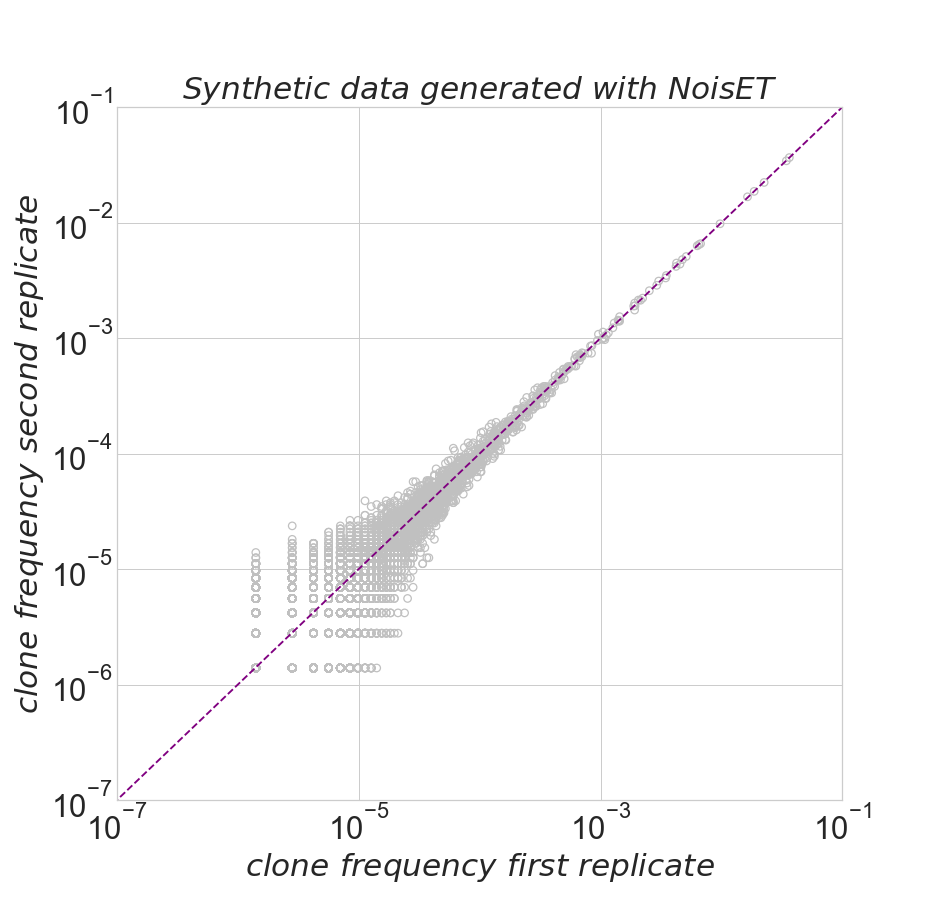

Text(0.5, 1.0, '$ Synthetic \\ data \\ generated \\ with \\ NoisET $')

In [29]:
%matplotlib notebook 

plt.figure(figsize=(10.4,10))

plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)
X = np.linspace(0,1, 1000)

plt.style.use('seaborn-whitegrid')
plt.scatter(pair_samples_gDNA['Clone_fraction_1'], pair_samples_gDNA['Clone_fraction_2'], c='none', edgecolor='silver')
plt.xlabel(r'$clone \ frequency \ first \ replicate $', fontsize = 25)
plt.ylabel(r'$clone \ frequency \ second \ replicate $', fontsize = 25)
plt.plot(X,X, linestyle ='--', color ='purple')
plt.xscale('log')
plt.yscale('log')
plt.axis([1e-7, 1e-1, 1e-7, 1e-1])

plt.title(r'$ Synthetic \ data \ generated \ with \ NoisET $', fontsize = 25)